<a href="https://colab.research.google.com/github/aysharega/M.Tech-Project-Thesis/blob/main/TL_Resnet_50_HGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning ResNet 50

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1771: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [55]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [56]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset1/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset1/test'


In [57]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [58]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [59]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/dataset1/train/*')

In [60]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [61]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [62]:

# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [63]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [64]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [65]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5600 images belonging to 3 classes.


In [66]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4568 images belonging to 3 classes.


In [67]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
  )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
175/175 [==============================] - 106s 556ms/step - loss: 1.0466 - accuracy: 0.7793 - val_loss: 0.1392 - val_accuracy: 0.9658
Epoch 2/25
175/175 [==============================] - 96s 548ms/step - loss: 0.1290 - accuracy: 0.9673 - val_loss: 0.0429 - val_accuracy: 0.9996
Epoch 3/25
175/175 [==============================] - 95s 541ms/step - loss: 0.0603 - accuracy: 0.9921 - val_loss: 0.0296 - val_accuracy: 0.9993
Epoch 4/25
175/175 [==============================] - 94s 540ms/step - loss: 0.0564 - accuracy: 0.9886 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 5/25
175/175 [==============================] - 98s 563ms/step - loss: 0.0306 - accuracy: 0.9962 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 6/25
175/175 [==============================] - 94s 539ms/step - loss: 0.0330 - accuracy: 0.9941 - val_loss: 0.0115 - val_accuracy: 0.9998
Epoch 7/25
175/175 [==============================] - 95s 543ms/step - loss: 0.0189 - accuracy: 0.9980 - val_loss: 0.0041 - val_a

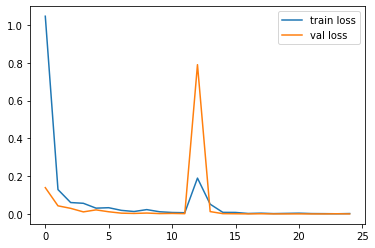

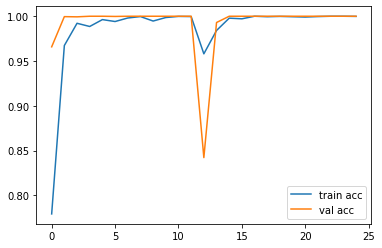

<Figure size 432x288 with 0 Axes>

In [70]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [71]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [91]:

y_pred = model.predict(test_set)


In [92]:
y_pred

array([[8.1969798e-10, 9.9999964e-01, 3.3114611e-07],
       [2.8907664e-06, 9.9922812e-01, 7.6905265e-04],
       [2.7155789e-05, 9.9997282e-01, 1.4949961e-08],
       ...,
       [6.1787625e-10, 5.9651667e-10, 1.0000000e+00],
       [1.0724256e-12, 1.0000000e+00, 1.1499102e-09],
       [1.2380720e-08, 9.9999928e-01, 6.6455857e-07]], dtype=float32)

In [93]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [94]:
y_pred

array([1, 1, 1, ..., 2, 1, 1])